In [1]:
from keras.models import load_model
!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

2022-11-26 15:29:18.982273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 15:29:19.187150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 15:29:19.187216: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 15:29:20.096847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

0.1.0


In [2]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_noses"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [25]:
# extract eyes from extracted_face_image
def extract_nose_from_extratced_face(filename, index, required_size = (200,200)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    try:
        if len(results)>=1:
            #print(results[0])
            xnose= results[0]['keypoints']['nose'][0]-35
            ynose = results[0]['keypoints']['nose'][1]+15
            width = results[0]['keypoints']['nose'][0] +35
            height = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2)+10
            nose = pixels[height:ynose, xnose:width]
            # resize pixels to the model size
            image = Image.fromarray(nose)
            image = image.resize(required_size)
            nose_array = np.asarray(image)
            plt.imshow(nose_array)
            plt.imsave(os.path.join(savedirimage, 'nose_img_{}.jpg'.format(index)),nose_array)
            return True
    except:
        None
    return False

In [26]:
files = os.listdir('extracted_faces_from_COCO/')

1/1 [==============================] - 0s 123ms/step
0
1/1 [==============================] - 0s 124ms/step
1
1/1 [==============================] - 0s 125ms/step
2
1/1 [==============================] - 0s 120ms/step
3
1/1 [==============================] - 0s 153ms/step
4
1/1 [==============================] - 0s 133ms/step
5
1/1 [==============================] - 0s 126ms/step
6
1/1 [==============================] - 0s 143ms/step
7
1/1 [==============================] - 0s 121ms/step
8
1/1 [==============================] - 0s 133ms/step
9
1/1 [==============================] - 0s 127ms/step
10
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 157ms/step
11
1/1 [==============================] - 0s 146ms/step
12
1/1 [==============================] - 0s 151ms/step
13
1/1 [==============================] - 0s 155ms/step
14
1/1 [==============================] - 0s 143ms/step
15
1/1 [==============================] - 0s 146ms/step
16
1/1 [==============================] - 0s 131ms/step
17
1/1 [==============================] - 0s 134ms/step
18
1/1 [==============================] - 0s 142ms/step
19
1/1 [==============================] - 0s 127ms/step
20
1/1 [==============================] - 0s 175ms/step
21
1/1 [==============================] - 0s 160ms/step
22
1/1 [==============================] - 0s 150ms/step
23
1/1 [==============================] - 0s 181ms/step
24
1/1 [==============================] - 0s 130ms/step
25
1/1 [==============================] - 0s 141ms/step
26
1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 122ms/step
27
1/1 [==============================] - 0s 122ms/step
28
1/1 [==============================] - 0s 126ms/step
29
1/1 [==============================] - 0s 131ms/step
30
1/1 [==============================] - 0s 132ms/step
31
1/1 [==============================] - 0s 162ms/step
32
1/1 [==============================] - 0s 154ms/step
33
1/1 [==============================] - 0s 130ms/step
34
1/1 [==============================] - 0s 134ms/step
35
1/1 [==============================] - 0s 124ms/step
36
1/1 [==============================] - 0s 127ms/step
37
1/1 [==============================] - 0s 139ms/step
38
1/1 [==============================] - 0s 122ms/step
39
1/1 [==============================] - 0s 125ms/step
40
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 135ms/step
41
1/1 [==============================] - 0s 169ms/step
42
1/1 [==============================] - 0s 151ms/step
43
1/1 [==============================] - 0s 140ms/step
44


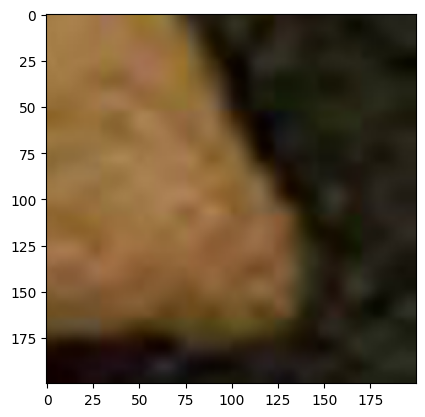

In [27]:
index =0
for file in files[0:50]:
    if extract_nose_from_extratced_face(os.path.join('./extracted_faces_from_COCO/',file), index = index):
        print(index)
        index+=1